# Fig5. Comparison among disciplinary backgrounds of researchers and projects 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define researchers and projects data path

In [2]:
file_path_i = "data/mapeo_investigadores.csv"

#### Define function to clean researchers data

In [47]:
def prepare_data(investigadores, num_of_topics):
    investigadores = read_csv(file_path_i)
    mini = investigadores[["Temas de investigación","ID investigador"]]
    mini.columns = ["tema", "id"]
    # split Research topics in rows with " | "
    filtered_df = mini.loc[mini["tema"].str.contains(' | ')]
    mini = mini.loc[mini["tema"].str.contains(' | ') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for tema in row.tema.split(" | "):
            new_discp.append([tema, row.id])
    fix_df = pd.DataFrame(new_discp, columns=["tema", "id"])
    mini = mini.append(fix_df)
    
    grouped = mini.groupby("tema")
    df_investigadores = grouped.count().sort_values(by=['id'], ascending=False)
    
    
    return df_investigadores.head(num_of_topics)

#### Function to translate disciplinary backgrounds

In [48]:
def translate(dataframe, column_to_translate, translations_filename):    
    translations_df = pd.read_csv(f"data/{translations_filename}", sep=';')
    translations_df.columns=["tema", "research_topic"]
    df_def = pd.merge(dataframe, translations_df, on=column_to_translate, how='outer', validate="one_to_many")
    return df_def

#### Run program
## Change 'num_of_topics' to show as many disciplinary backgrounds as you want'

In [49]:
num_of_topics = 20
investigadores = read_csv(file_path_i)
df2 = prepare_data(investigadores, num_of_topics)
df2 = translate(df2, "tema", "temas.csv")

In [50]:
df2

,tema,id,research_topic
0,Estudios literarios digitales,119.0,Digital Literary Studies
1,Comunicación digital,65.0,Digital communication
2,Bibliotecas digitales,63.0,Digital libraries
3,"Archivos digitales, repositorios y preservación",60.0,Digital repositories and preservation
4,Lingüística y lenguas,59.0,Linguistics and languages
5,Bases de datos,51.0,Databases
6,Ciencias y Técnicas Historiográficas,51.0,Historiographic Techniques
7,Patrimonio digital,46.0,Digital heritage
8,GLAM,36.0,GLAM
9,Ciencias de la educación,33.0,NaN


#### Print horizontal bar plot

<Figure size 432x288 with 0 Axes>

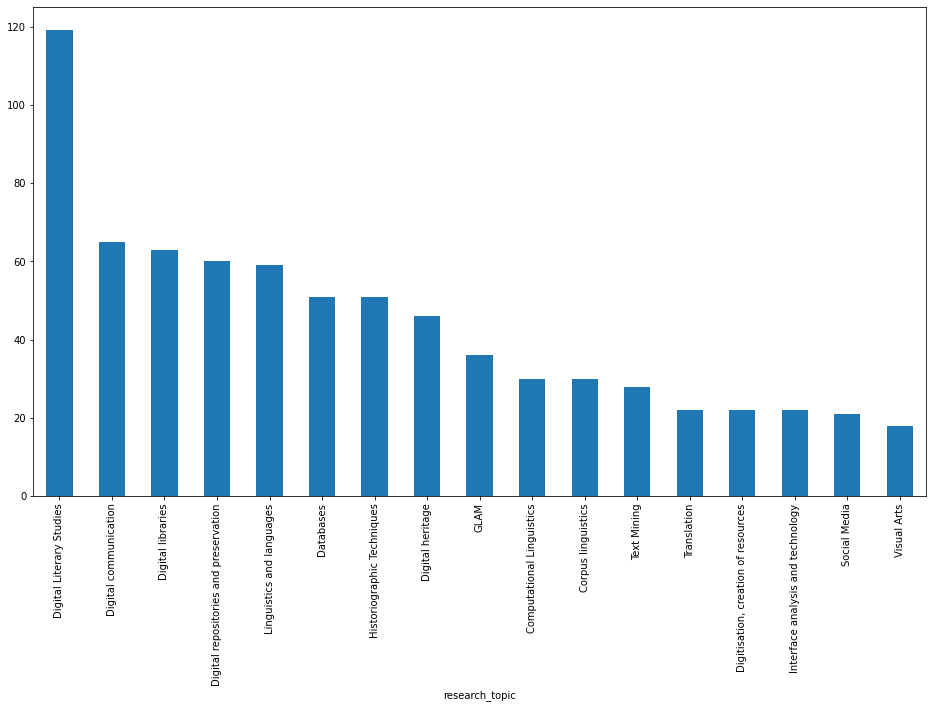

In [35]:
plt.figure()
ax = df2.plot.bar(x="research_topic", figsize=(16,9), legend=False)
ax.set_ylabel("")
# ax.xaxis.tick_top() 
# ax.invert_yaxis()
plt.show()